# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading the Dataset

In [2]:
df = pd.read_csv("D:\\Downloads\\CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Checking Missing Values

In [4]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Preparing data

In [6]:
df["CarName"] = [i.split()[0]  for i in df["CarName"].values]

In [7]:
encoder = OrdinalEncoder()

In [8]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = encoder.fit_transform(df[[i]]).astype("int64")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [10]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,2,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,2,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,26,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,26,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,26,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,26,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


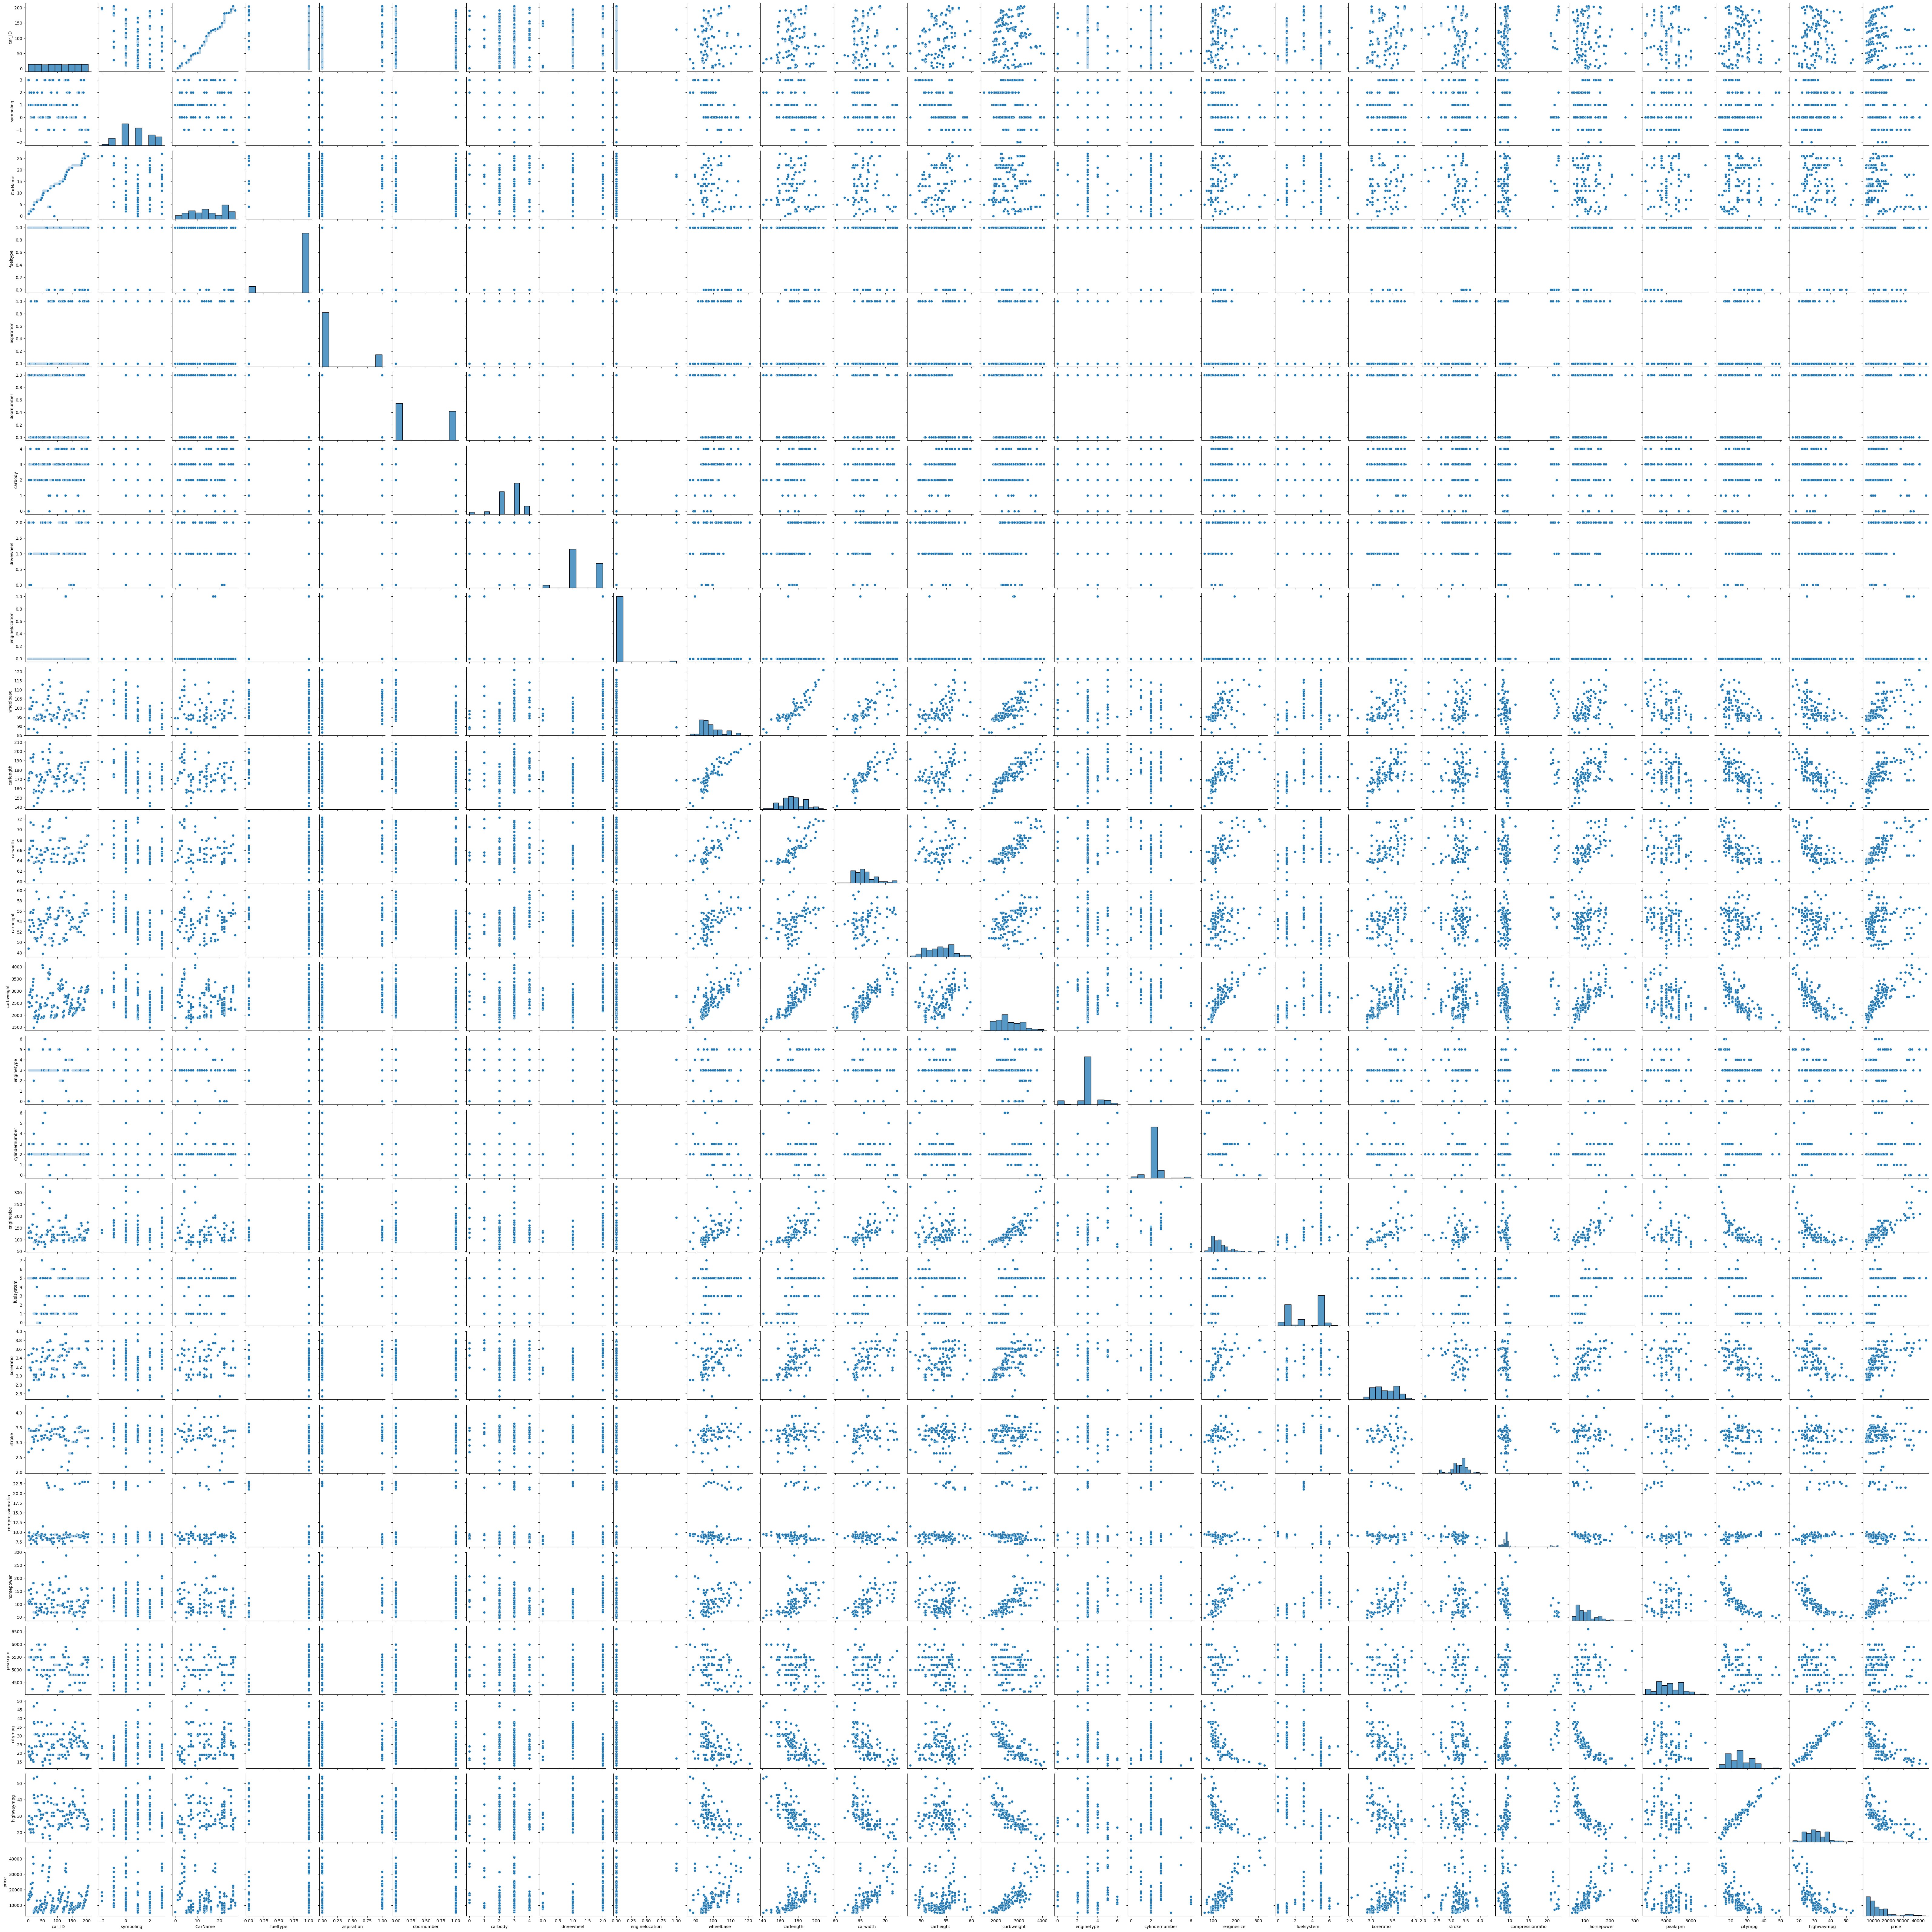

In [11]:
sns.pairplot(df)
plt.show()

# Selecting Feature & Target Columns

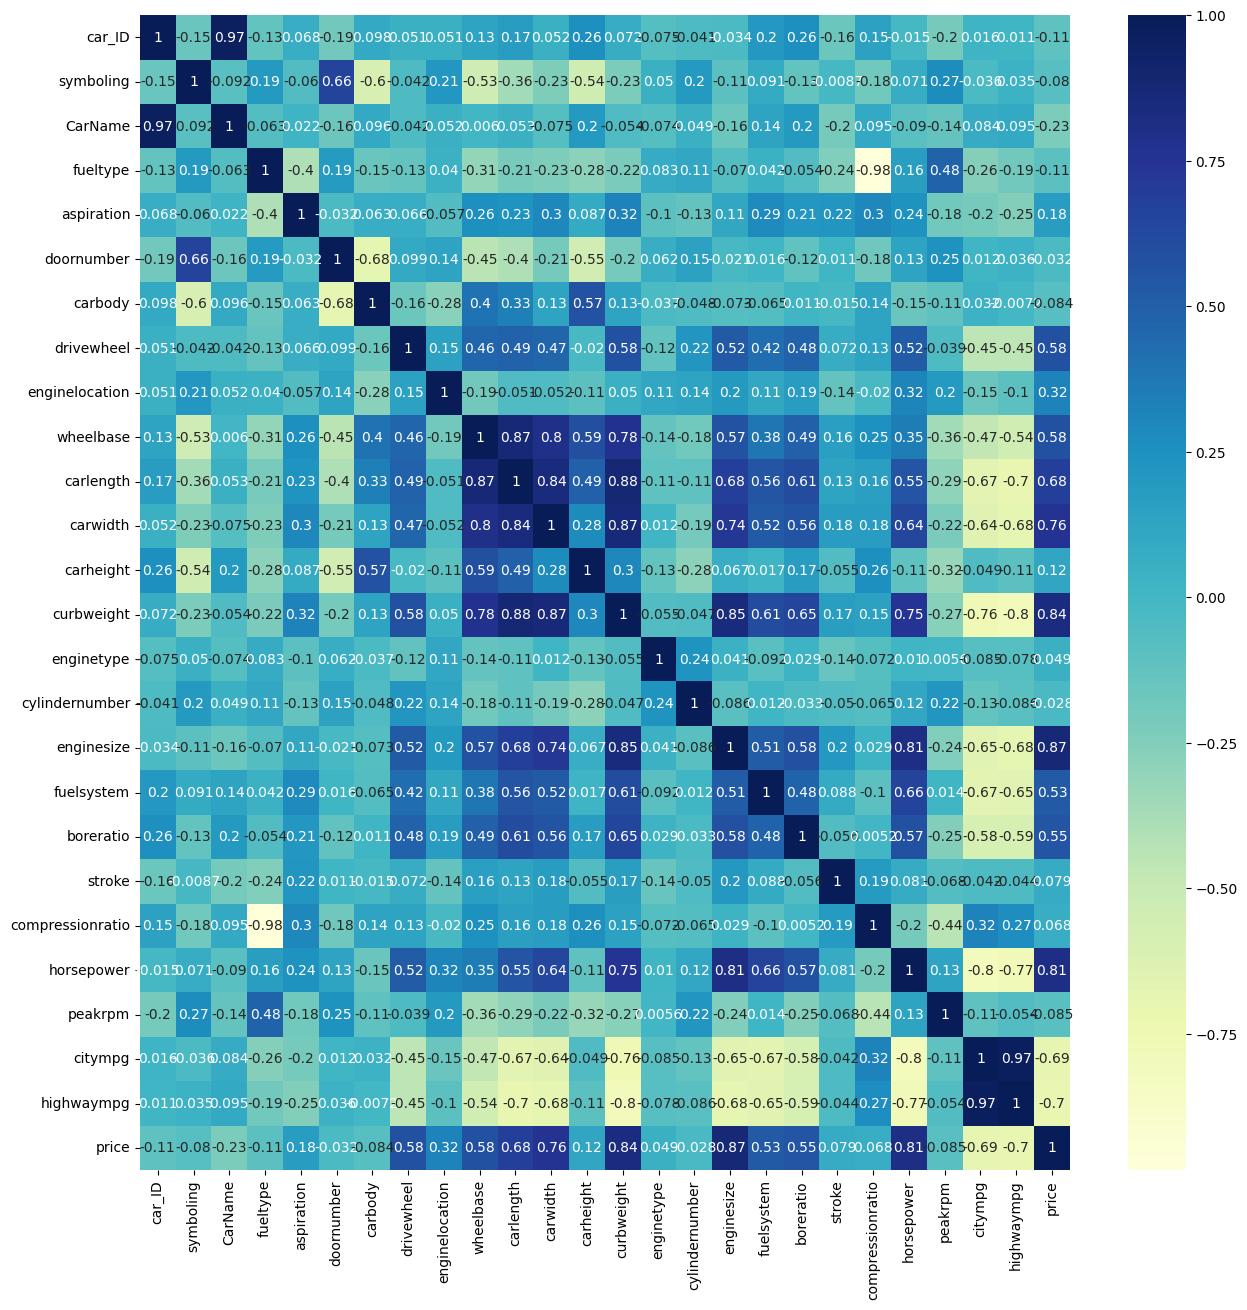

In [12]:
plt.figure(figsize=(15, 15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [13]:
cor_target = abs(cor["price"])

In [14]:
relevant_features = cor_target[cor_target > 0.5]

In [15]:
relevant_features

drivewheel    0.577992
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
fuelsystem    0.526823
boreratio     0.553173
horsepower    0.808139
citympg       0.685751
highwaympg    0.697599
price         1.000000
Name: price, dtype: float64

In [16]:
relevant_cols = relevant_features.index.values

In [17]:
cols = []

In [18]:
for i in df.columns:
    if i not in relevant_cols:
        cols.append(i)

In [19]:
df = df.drop(cols, axis=1)

In [20]:
df

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,2.68,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,3.19,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,3.78,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,3.78,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,3.58,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,3.01,106,26,27,22470.0


In [21]:
X = df.drop("price", axis=1).values
y = df["price"].values

# Splitting the Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Model Creation

In [23]:
model = LinearRegression()

# Train the Model

In [24]:
model.fit(X_train, y_train)

LinearRegression()

# Calculating Accuracy Score

In [25]:
model.score(X_test, y_test)

0.7621523672109486

# Predicting Output

In [26]:
y_pred = model.predict(X_test)

# Comparision between Actual and Predicted

In [27]:
comparision_df = pd.DataFrame()
comparision_df["Actual"] = y_test
comparision_df["Prediction"] = y_pred

In [28]:
comparision_df

,Actual,Prediction
0,9279.000,11270.399919
1,9960.000,8361.651302
2,6377.000,6091.684142
3,16925.000,10066.525578
4,8778.000,9693.137948
5,16500.000,21035.214530
6,22018.000,17390.736888
7,7499.000,6389.541632
8,18344.000,13112.640197
9,10795.000,10055.802797
